1.時系列データにおけるk近傍法について調査し、軽く記述してください。

正常データの集合に対して観測点がどの程度離れているかを計算し異常度の指標とする。距離が離れほど観測点は異常だと判断される。

2.仮想通貨(暗号通貨)４本値CSVゲッター from Cryptowatch
から2016年12月30~2017年12月31のビットコイン価格データをダウンロードしてください。
ダウンロードが終わったら以下のコードを用いて、価格変動を可視化してください。

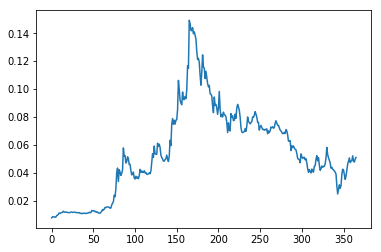

In [119]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean, variance
from sklearn.neighbors import NearestNeighbors

data = pd.read_csv("btc.csv", encoding="shift-jis", header=None)
X = data.iloc[:,0:1].values
Y = data.iloc[:,1:2].values

plt.plot(Y[:,0])
#print("{} {}".format(type(X), X.shape))

3.実装
時系列データにおけるKNNを実装してもらいます。以下にアルゴリズムフローを載せます。下の雛形も用いてください。

In [50]:
from sklearn.neighbors import NearestNeighbors

In [126]:
def knn(wide, k, X):
    anormaly_score = []
    
    samples = len(X) - wide - 1
    #Dataを任意のseqに分ける(sliding winodwのように)
    for i in range(samples):
        s_index = i
        e_index = i + wide
        data_x = X[s_index:e_index]
        point_x = X[e_index]
        u_d = np.sqrt(np.power(data_x - point_x, 2))
        u_d = np.sort(u_d)
        ave_u_d = np.average(u_d[0:k])
        anormaly_score.append(ave_u_d)
    
    return anormaly_score

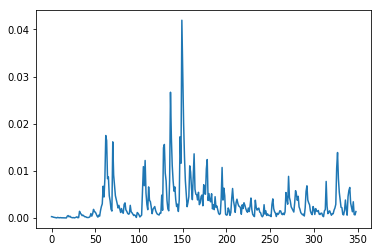

In [127]:
anormaly_score = knn(16,5, Y[:,0])
#print(anormaly_score[1])
plt.plot(anormaly_score)